# Statistical-Methods Homework6: Bias, Variance, MSE值随选择变量数的变化

https://github.com/QiushiSun

为了研究线性回归模型中出现过拟合和欠拟合时偏差、方差和均方误差的关系，我们通过随机模拟进行变量选择，模拟线性回归模型的过拟合和欠拟合时Bias、Var、MSE的相对关系。

理论依据：
$$
\operatorname{MSE}\left(\hat{y}_{0}\right)=E\left(\hat{y}_{0}-E\left(y_{0}\right)\right)^{2}=\operatorname{Bias}^{2}\left(\hat{y}_{0}\right)+\operatorname{Var}\left(\hat{y}_{0}\right)
$$

在模拟中，我们定义

$$
\begin{aligned}
\operatorname{Bias}_{k}^{2} &=\left(\frac{1}{M} \sum_{m=1}^{M} \hat{y}_{0, m}^{(k)}-\boldsymbol{x}_{0}^{\prime} \boldsymbol{\beta}\right)^{2} \\
\operatorname{Var}_{k} &=\frac{1}{M} \sum_{m=1}^{M}\left(\hat{y}_{0, m}^{(k)}-\frac{1}{M} \sum_{m=1}^{M} \hat{y}_{0, m}^{(k)}\right)^{2} \\
\mathrm{MSE}_{k} &=\frac{1}{M} \sum_{m=1}^{M}\left(\hat{y}_{0, m}^{(k)}-\boldsymbol{x}_{0}^{\prime} \boldsymbol{\beta}\right)^{2}
\end{aligned}
$$

In [120]:
# load some packages
import math
import numpy as np
import random
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [121]:
model = LinearRegression() #使用sklearn的线性回归

def LinReg(x, y):
    model = LinearRegression() #调用线性回归
    model.fit(x, y) #开始拟合
    return [model.intercept_] + list(model.coef_) #返回intercept和系数，连接在一起

In [122]:
# 初始化 偏差，方差，MSE
Bias_square = []
Variance = []
MSE = []

Sim_time = 5000
N = 500

Factor_start = 2 #最少选择两个自变量
Factor_finish = 18 #最多选择十八个自变量
Total_Factor = 20 #总共有二十个自变量

Simulation_Range = range(Factor_start, Factor_finish + 1)
cov = np.zeros((20,20))
pivot = 0

# 初始化一个协方差矩阵，对角线初始化为1，其余部分全部初始化为0.02

# 这里其实可以用np.array()写在一行里，但是可读性很差
for i in range(0,20):
    cov[i][pivot] = 1
    pivot = pivot + 1 # pivot 初始化为1
    for left in range(0,pivot-1):
        cov[i][left]=0.02
    for right in range(pivot,20):
        cov[i][right]=0.02
        
        
# 待预测样本
x0 = np.zeros(Total_Factor+1)
x0[0]=1
for i in range(1,Total_Factor+1):
    x0[i]=0.5

# 初始化权重向量
W = np.array([1] + [((Total_Factor - num + 2)/((Total_Factor+5) * Total_Factor/2)) for num in range(Total_Factor)])

# 真实值
y0 = (W * x0).sum()

In [124]:
for R in Simulation_Range:
    # 每个参数选择情况选择一次，然后模拟5000次
    y_hat = []
    for M in range(Sim_time): 
        x = np.random.multivariate_normal(np.zeros((Total_Factor)), Cov, (N,),'raise') #raise是用来限制正定
        # 初始化多元正态分布
        y = [((W * ([1.0] + list(x[n1]))).sum()) for n1 in range(N)] + np.random.normal(size=N, scale=2) #scale是标准差
        # 初始化y
        beta = np.array(LinReg([x[n2][:R] for n2 in range(N)], y))
        # 线性回归获得beta
        y_hat.append((beta * x0[:R+1]).sum())
    y_hat = np.array(y_hat) #y的估计y_hat
   
    Bias_square.append((y_hat.mean() - y0) ** 2) # 注意mean的是y_hat
    Variance.append(((y_hat - y_hat.mean()) ** 2).mean())
    MSE.append(((y_hat - y0) ** 2).mean())

In [125]:
print(beta) #可以看到第一项为截距项，后面为权重系数

[ 0.97810422  0.09613969  0.26383144  0.05278557  0.08086797 -0.10062772
  0.24326254  0.1158927  -0.03561202  0.23314127 -0.0220613   0.10878291
  0.19346671  0.00434821  0.0404468  -0.01714273 -0.04755277  0.15061277
 -0.1346967 ]


MSE: 0.1674676366536075 Factor numbers: 2
MSE: 0.137038417554567 Factor numbers: 3
MSE: 0.11298119724582298 Factor numbers: 4
MSE: 0.09096536685858551 Factor numbers: 5
MSE: 0.07490716501100197 Factor numbers: 6
MSE: 0.06386094307047534 Factor numbers: 7
MSE: 0.05149981755576409 Factor numbers: 8
MSE: 0.047396526654873795 Factor numbers: 9
MSE: 0.04113563560809879 Factor numbers: 10
MSE: 0.03742899585979551 Factor numbers: 11
MSE: 0.03514483496373823 Factor numbers: 12
MSE: 0.034671599255687996 Factor numbers: 13
MSE: 0.03348681787779672 Factor numbers: 14
MSE: 0.033317726943218356 Factor numbers: 15
MSE: 0.035063654457755174 Factor numbers: 16
MSE: 0.033646899259027155 Factor numbers: 17
MSE: 0.03612940775577505 Factor numbers: 18
MSE 最⼩所对应的⾃变量个数: 15 MSE: 0.033317726943218356


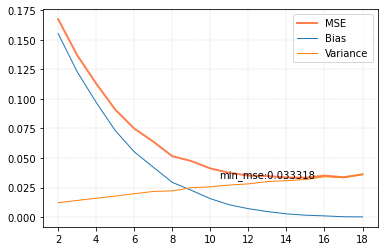

In [126]:
for i in range(0,len(MSE)):
    print('MSE:',MSE[i],'Factor numbers:',i+2)
    
plt.plot(Simulation_Range, MSE, linewidth=2, label="MSE", color="coral")
plt.plot(Simulation_Range, Bias_square, linewidth=1, label="Bias")
plt.plot(Simulation_Range, Variance, linewidth=1, label="Variance")
plt.grid(True, linestyle = "-.", linewidth = "0.25")

min_mse_factor = np.argmin(MSE) 
min_mse = np.min(MSE)

print('MSE 最⼩所对应的⾃变量个数:',min_mse_factor+2,'MSE:',min_mse)
plt.text(min_mse_factor, min_mse, 
         'min_mse:%f'%float(min_mse), 
         ha='center', va='baseline', 
         fontsize=10)

plt.legend()
plt.show()

**End of Homework6**